# Link to the Google drive folder:

https://drive.google.com/drive/folders/1BtP140hlTSvvWNm80V-SJi_z9Fta4Nte?usp=share_link



#Team 6
* Chengsong Zhang cz81@illinois.edu
* Lijuan Geng lijuang2@illinois.edu
* Yujia Chen ychen275@illinois.edu

# Mount Notebook to Google Drive


In [1]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


# Introduction

*   Background of the problem

  There are three main types of Drug-drug interactions (DDI): synergistic (working together or cooperative), antagonistic (showing dislike or opposition) and no reaction. Predicting DDIs associated events has become increasingly important for applications in drug development and disease diagnosis.

  With advancements in machine leanring technology, methods of DDI's prediction have evolved from traditional methods, including text mining and statistical methods, to machine learning methods.

*   Paper explanation

  This work aims to study whether two drugs interact and the specific interaction types. The paper proposed a novel learning-based algorithm, named CNN-DDI, which uses convolutional neural networks (CNN) to learn the best combination of drug features and predict DDI-associated events. The CNN-DDI method contains two parts. The first part is a feature selection framework, which extracts feature interactions from drug categories, targets, pathways and enzymes as feature vectors and employ Jaccard similarity as the measurement of drug similarity. The other part is CNN-based DDI predictor, that predicts DDI-associated events based on feature pairs selected from feature selection framework.

  The results in the paper indicate that drug category is an effective new feature type to be applied in CNN-DDI. Using multiple features leads to better results than using a single feature. CNN-DDI has better performance than other state-of-art models, such as Logistic Regression, Random Forest, KNN, on the task of predicting DDIs.







# Scope of Reproducibility:

We would like to reproduce and verify the following hypotheses from the paper:

1. CNN-DDI's prediction performance is improved when using drug category as a new feature.

2. Using multiple features leads to better performance of CNN-DDI than using single feature.

3. CNN-DDI performs better than other state-of-art models, such as Logistic Regression, Random Forest, KNN.

4. CNN-DDI performs better than a related work: DDIMDL.


Below shows the framework of CNN-DDI algorithm; the structure of prediction model; and the convolution layers of CNN-DDI


Downloading...
From: https://drive.google.com/uc?id=1tksvvJK__a7B2UEIwYvXxaidkI6Vh_1l
To: /content/Process.jpg
100%|██████████| 499k/499k [00:00<00:00, 19.8MB/s]


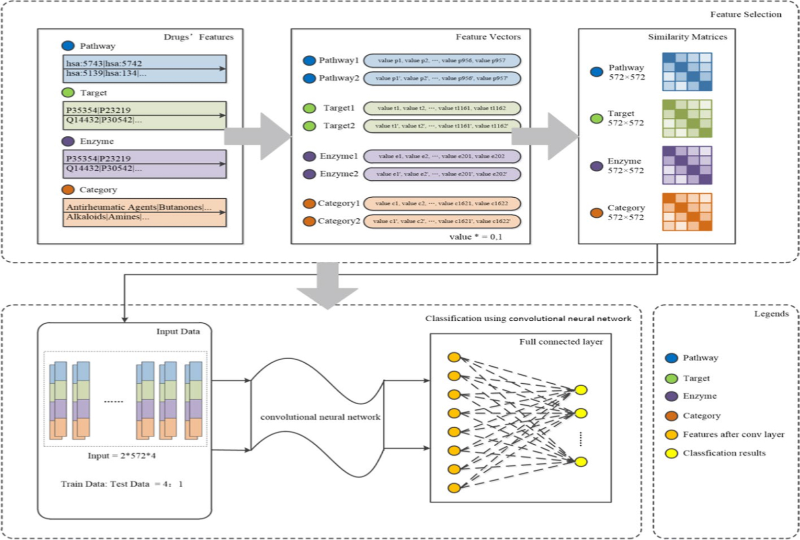

Downloading...
From: https://drive.google.com/uc?id=1j7y2Z-hdeyO3DqGhvr621MSGFP-Z_XmB
To: /content/Model.jpg
100%|██████████| 160k/160k [00:00<00:00, 16.9MB/s]


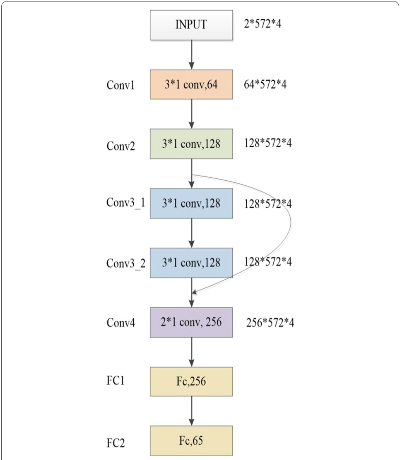

Downloading...
From: https://drive.google.com/uc?id=14Amdu0p6fcTKrK-1bMqgP-eSA0G_P7pU
To: /content/Size.jpg
100%|██████████| 70.3k/70.3k [00:00<00:00, 55.8MB/s]


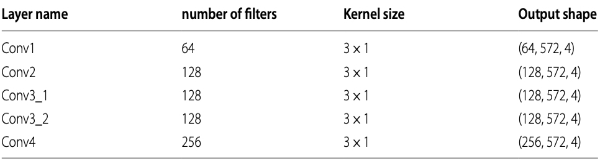

In [2]:

import cv2
import gdown
from google.colab.patches import cv2_imshow

url_1 = 'https://drive.google.com/uc?id=1tksvvJK__a7B2UEIwYvXxaidkI6Vh_1l'
output1 = "Process.jpg"
file1 = gdown.download(url_1, output1)
img1=cv2.imread(file1)
img_1 = cv2.resize(img1, (800, 540))
cv2_imshow(img_1)


url_2 = 'https://drive.google.com/uc?id=1j7y2Z-hdeyO3DqGhvr621MSGFP-Z_XmB'
output2 = "Model.jpg"
file2 = gdown.download(url_2, output2)
img2=cv2.imread(file2)
img_2 = cv2.resize(img2, (400, 460))
cv2_imshow(img_2)

url_3 = 'https://drive.google.com/uc?id=14Amdu0p6fcTKrK-1bMqgP-eSA0G_P7pU'
output3 = "Size.jpg"
file3 = gdown.download(url_3, output3)
img3=cv2.imread(file3)
img_3 = cv2.resize(img3, (600, 160))
cv2_imshow(img_3)

# Methodology

This methodology is the core of your project. It consists of run-able codes with necessary annotations to show the expeiment you executed for testing the hypotheses.

The methodology at least contains two subsections **data** and **model** in your experiment.

In [3]:
# import  packages you need
import numpy as np
from google.colab import drive
import pandas as pd
from pandas import DataFrame
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from google.colab import files
import gdown

##  Data

  * Source of the data: The original dataset was proposed by Deng et al. [2] from the Drugbank online database.
  * Statistics: The drug_features dataset contains information of 572 drugs and its features like pathway, target, and enzyme; the extraction dataset contains 37,264 DDIs with 65 DDI types.
  * Data process: We extract 572 drugs' drug category feature from the Drugbank online database, add it into the drug_fectures dataset, so that we have 4 features to use: pathway, target, enzyme and drug category. Then, we use one-hot encoding to transform drug features into fecture vector, and use Jaccard Similarity to convert feature vector into 572 dimensions. We split the data into training and validation sets with test_size=0.2.

In [4]:
def feature_vector(feature_name, df):
    def Jaccard(matrix):
        matrix = np.mat(matrix)

        numerator = matrix * matrix.T

        denominator = (
            np.ones(np.shape(matrix)) * matrix.T
            + matrix * np.ones(np.shape(matrix.T))
            - matrix * matrix.T
        )

        return numerator / denominator

    all_feature = []
    drug_list = np.array(df[feature_name]).tolist()
    # Features for each drug, for example, when feature_name is target, drug_list=["P30556|P05412","P28223|P46098|……"]
    for i in drug_list:
        for each_feature in i.split("|"):
            if each_feature not in all_feature:
                all_feature.append(each_feature)  # obtain all the features
    #print("length of all feature is", len(all_feature))
    feature_matrix = np.zeros((len(drug_list), len(all_feature)), dtype=float)
    df_feature = DataFrame(
        feature_matrix, columns=all_feature
    )  # Consrtuct feature matrices with key of dataframe
    for i in range(len(drug_list)):
        for each_feature in df[feature_name].iloc[i].split("|"):
            df_feature[each_feature].iloc[i] = 1

    df_feature = np.array(df_feature)
    sim_matrix = np.array(Jaccard(df_feature))

    #print(feature_name + " len is:" + str(len(sim_matrix[0])))
    return sim_matrix


def prepare(df_drug, feature_list, mechanism, action, drugA, drugB):
    d_label = {}
    d_feature = {}

    # Transfrom the interaction event to number
    d_event = []
    for i in range(len(mechanism)):
        d_event.append(mechanism[i] + " " + action[i])

    count = {}
    for i in d_event:
        if i in count:
            count[i] += 1
        else:
            count[i] = 1
    event_num = len(count)
    list1 = sorted(count.items(), key=lambda x: x[1], reverse=True)
    for i in range(len(list1)):
        d_label[list1[i][0]] = i

    vector = []
    for i in feature_list:
        #vector = np.hstack((vector, feature_vector(i, df_drug, vector_size)))
        vector.append(feature_vector(i, df_drug))
    vector = np.stack(vector, axis=-1)
    # Transfrom the drug ID to feature vector
    for i in range(len(np.array(df_drug["name"]).tolist())):
        d_feature[np.array(df_drug["name"]).tolist()[i]] = vector[i]

    # Use the dictionary to obtain feature vector and label
    new_feature = []
    new_label = []

    for i in range(len(d_event)):
        temp = np.concatenate([d_feature[drugA[i]][None], d_feature[drugB[i]][None]], axis=0)
        new_feature.append(temp)
        new_label.append(d_label[d_event[i]])

    new_feature = np.array(new_feature)  # 323539*....
    new_label = np.array(new_label)  # 323539

    return new_feature, new_label, event_num


url1 = 'https://drive.google.com/uc?id=1EQp5p2bPloVnLq28G_G94xs2SrM-2Hhv'
output1 = "drug_features.csv"
file1 = gdown.download(url1, output1)
df_drug = pd.read_csv(file1)

url2 = 'https://drive.google.com/uc?id=1ZjzdxeOam8qwslBVmWKaWcZ6t5UqnXQ9'
output2 = "extraction.csv"
file2 = gdown.download(url2, output2)
extraction = pd.read_csv(file2)

print(df_drug.shape)
print(extraction.shape)
#df_drug = pd.read_csv("drug_features.csv")
#extraction = pd.read_csv("extraction.csv")
mechanism = extraction["mechanism"]
action = extraction["action"]
drugA = extraction["drugA"]
drugB = extraction["drugB"]
feature_list = ["pathway", "target", "enzyme", "category"]
new_feature, new_label, event_num = prepare(df_drug, feature_list, mechanism, action, drugA, drugB)
new_feature = torch.tensor(new_feature, dtype=torch.float32)


Downloading...
From: https://drive.google.com/uc?id=1EQp5p2bPloVnLq28G_G94xs2SrM-2Hhv
To: /content/drug_features.csv
100%|██████████| 841k/841k [00:00<00:00, 66.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ZjzdxeOam8qwslBVmWKaWcZ6t5UqnXQ9
To: /content/extraction.csv
100%|██████████| 2.93M/2.93M [00:00<00:00, 172MB/s]


(572, 8)
(37264, 5)


##   Model

 * Model architecture: Our model is a CNN model, including 5 convolutional layers and 2 fully-connected layers. For convolutional layers, the filters’ numbers are 64, 128, 128, 128 and 256, and the kernel size is 3*1. In addition, we add a residual block between two convolutional layers, which adds the output of conv2 to the output of conv3_2. The activation function we use is Leaky ReLU for the 5 convolutional layers and 1 fully-connected layer, for the last fully-connected layer we use Softmax.
 * Training objectives: For the loss function, we use focal loss based on what the paper provided, because focal loss is more useful for training imbalanced datasets. For the optimizer, we use Adam optimizer with learning rate = 0.001.
 * Others: Because our model takes a long time to train, here we set epoch = 0 just to show our training process. In our acutal training, we set epoch = 50. We have attached our training result in the result session for reference.

In [5]:
class DrugInteractionDataset(Dataset):
    def __init__(self, features, labels):
        self.features = torch.tensor(features, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, index):
        return self.features[index], self.labels[index]

# Split the data into training and validation sets
features_train, features_val, labels_train, labels_val = train_test_split(
    new_feature, new_label, test_size=0.2, random_state=42
)

# Create dataset objects
train_dataset = DrugInteractionDataset(features_train, labels_train)
val_dataset = DrugInteractionDataset(features_val, labels_val)

# Create data loaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

class CNNDDI(nn.Module):
    def __init__(self):
        super(CNNDDI, self).__init__()
        self.conv1 = nn.Conv2d(2, 64, (3, 1), padding=(1, 0))
        self.conv2 = nn.Conv2d(64, 128, (3, 1), padding=(1, 0))
        self.conv3_1 = nn.Conv2d(128, 128, (3, 1), padding=(1, 0))
        self.conv3_2 = nn.Conv2d(128, 128, (3, 1), padding=(1, 0))
        self.conv4 = nn.Conv2d(128, 256, (3, 1), padding=(1, 0))
        self.fc1 = nn.Linear(256 * 572 * 4, 256)  # Adjust feature_size based on your input dimensions
        self.fc2 = nn.Linear(256, 65)  # Assuming 65 DDI types

    def forward(self, x):
        x = F.leaky_relu(self.conv1(x), negative_slope=0.2)
        x = F.leaky_relu(self.conv2(x), negative_slope=0.2)
        identity = x
        x = F.leaky_relu(self.conv3_1(x), negative_slope=0.2)
        x = self.conv3_2(x)
        x += identity
        x = F.leaky_relu(x, negative_slope=0.2)
        x = F.leaky_relu(self.conv4(x), negative_slope=0.2)
        x = torch.flatten(x, 1)
        x = F.leaky_relu(self.fc1(x), negative_slope=0.2)
        x = self.fc2(x)
        return x

def train(model, device, train_loader, optimizer, criterion):
    model.train()
    total_loss = 0
    for features, labels in train_loader:
        features, labels = features.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(features)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(train_loader)

def validate(model, device, val_loader, criterion):
    model.eval()
    total_loss = 0
    correct = 0
    with torch.no_grad():
        for features, labels in val_loader:
            features, labels = features.to(device), labels.to(device)
            outputs = model(features)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            correct += (predicted == labels).sum().item()
    val_loss = total_loss / len(val_loader)
    val_accuracy = correct / len(val_loader.dataset)
    return val_loss, val_accuracy

def save_checkpoint(model, optimizer, epoch, filename):
    state = {
        'epoch': epoch,
        'state_dict': model.state_dict(),
        'optimizer': optimizer.state_dict()
    }
    torch.save(state, filename)
    print(f"Saved checkpoint: {filename}")

class focal_loss(nn.Module):
    def __init__(self, gamma=2):
        super(focal_loss, self).__init__()
        self.gamma = gamma

    def forward(self, preds, labels):
        labels = labels[..., None]

        preds_logsoft = F.log_softmax(preds, dim=1)
        preds_softmax = torch.exp(preds_logsoft)

        preds_softmax = preds_softmax.gather(1, labels)
        preds_logsoft = preds_logsoft.gather(1, labels)

        loss = -torch.mul(torch.pow((1 - preds_softmax), self.gamma), preds_logsoft)

        loss = loss.mean()

        return loss

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNNDDI().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = focal_loss()

num_epochs = 0
#checkpoint_interval = 1

for epoch in tqdm(range(num_epochs)):
    train_loss = train(model, device, train_loader, optimizer, criterion)
    val_loss, val_accuracy = validate(model, device, val_loader, criterion)
    print(f'Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')

    #if (epoch + 1) % checkpoint_interval == 0 or (epoch + 1) == num_epochs:
        #save_checkpoint(model, optimizer, epoch + 1, f'checkpoints/cnn_ddi_epoch_{epoch+1}.pt')


<ipython-input-5-8650b153f4b0>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.features = torch.tensor(features, dtype=torch.float32)
0it [00:00, ?it/s]


# Results

* We use batch_size = 32 and num_epochs = 50 for training, and after 50 epochs, our Validation Accuracy = 0.8936, which is pretty close to paper's result (accuracy = 0.8871).
* We have attached our training result below for reference.
* Also, we have saved checkpoints in cloud and can load the checkpoint to compare our results, below is an example of loading checkpoint, which shows that all keys matched successfully.
* We have plot our validation loss and training loss, which shows the training loss is relatively low, and the validation loss is relatively high.
* We also plot our validation accuracy for the 50 epochs as below.

In [6]:
cnn_ddi = CNNDDI()
state_dict = torch.hub.load_state_dict_from_url("https://huggingface.co/conrevo/CS598-CNN-DDI/resolve/main/cnn_ddi_epoch_50.pt", model_dir="checkpoints",map_location=torch.device('cpu'))
cnn_ddi.load_state_dict(state_dict["state_dict"])

Downloading: "https://huggingface.co/conrevo/CS598-CNN-DDI/resolve/main/cnn_ddi_epoch_50.pt" to checkpoints/cnn_ddi_epoch_50.pt
100%|██████████| 1.68G/1.68G [00:20<00:00, 89.0MB/s]


<All keys matched successfully>

Downloading...
From: https://drive.google.com/uc?id=1Nhcwel6x4zGGDCpbJ1cDvmcLsrLB9dgZ
To: /content/result1.png
100%|██████████| 265k/265k [00:00<00:00, 45.0MB/s]


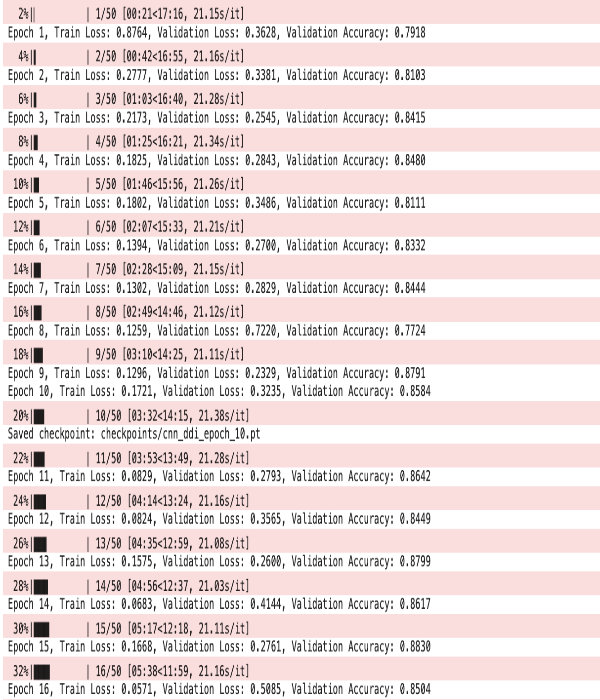

Downloading...
From: https://drive.google.com/uc?id=1f32Ou3nJ1_qF2a_9MoQddzJCzAYNvgnj
To: /content/result2.png
100%|██████████| 281k/281k [00:00<00:00, 43.9MB/s]


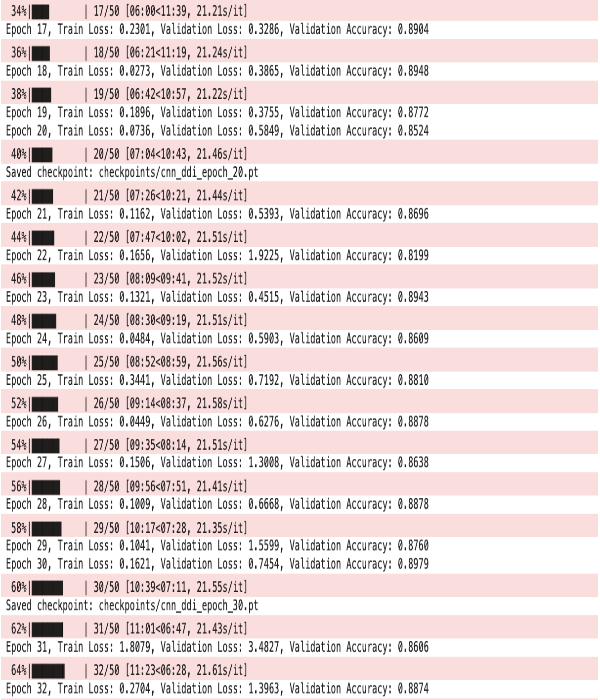

Downloading...
From: https://drive.google.com/uc?id=1mX819FE10mAav-8t5KF2N5UCcsWW9_UL
To: /content/result3.png
100%|██████████| 314k/314k [00:00<00:00, 45.1MB/s]


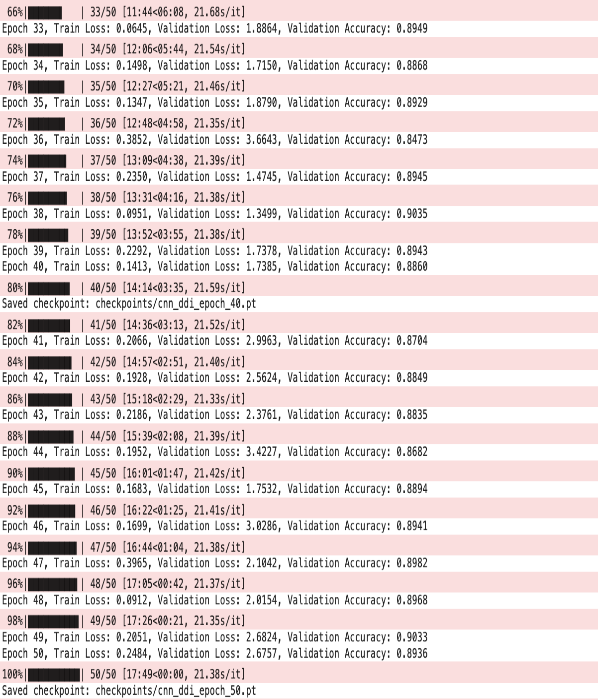

In [7]:

url_4 = 'https://drive.google.com/uc?id=1Nhcwel6x4zGGDCpbJ1cDvmcLsrLB9dgZ'
output4 = "result1.png"
file4 = gdown.download(url_4, output4)
img4=cv2.imread(file4)
img_4 = cv2.resize(img4, (600, 700))
cv2_imshow(img_4)


url_5 = 'https://drive.google.com/uc?id=1f32Ou3nJ1_qF2a_9MoQddzJCzAYNvgnj'
output5 = "result2.png"
file5 = gdown.download(url_5, output5)
img5=cv2.imread(file5)
img_5 = cv2.resize(img5, (600, 700))
cv2_imshow(img_5)

url_6 = 'https://drive.google.com/uc?id=1mX819FE10mAav-8t5KF2N5UCcsWW9_UL'
output6 = "result3.png"
file6 = gdown.download(url_6, output6)
img6=cv2.imread(file6)
img_6 = cv2.resize(img6, (600, 700))
cv2_imshow(img_6)



Downloading...
From: https://drive.google.com/uc?id=1fUfGzXACtqjfUPkTVTWjEHMNLz5E1y1O
To: /content/result.txt
100%|██████████| 1.24k/1.24k [00:00<00:00, 1.67MB/s]


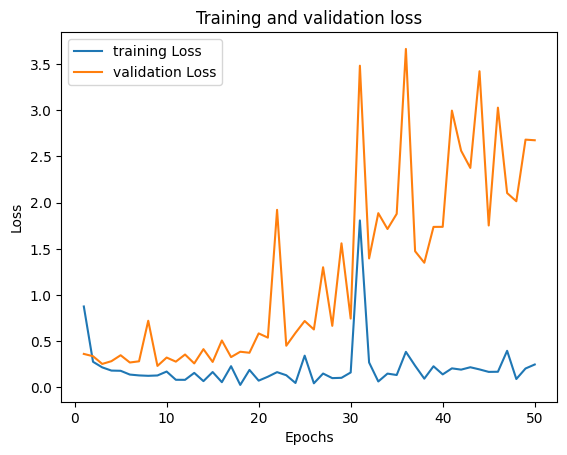

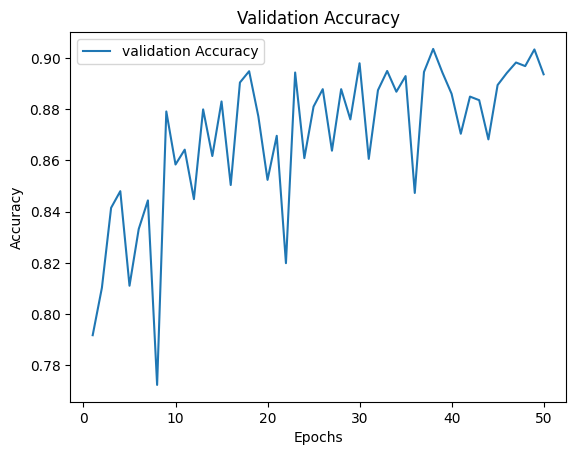

In [13]:
import matplotlib.pyplot as plt

url3 = 'https://drive.google.com/uc?id=1fUfGzXACtqjfUPkTVTWjEHMNLz5E1y1O'
output_3 = "result.txt"
file_3 = gdown.download(url3, output_3)
df_result = pd.read_csv(file_3)

lines = df_result.plot.line(x='Epoch', y=['TrainLoss', 'ValidationLoss'])
plt.title('Training and validation loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['training Loss', 'validation Loss'], loc='upper left')
plt.show()

lines = df_result.plot.line(x='Epoch', y=['ValidationAccuracy'])
plt.title('Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['validation Accuracy'], loc='upper left')
plt.show()

## Model comparison

Our CNN model has accuracy = 0.8936, while in the paper, CNN-DDI has accuracy = 0.8871, which shows we have successfully build the model and our model is slightly better than the original model the paper proposed. Compared to other silimar model like DDIMDL which has accuracy = 0.8852, our model also outperform DDIMDL.

# Discussion

 Overall, the paper is reproducible only with additional references to other papers and repositories.


 Here are some of the major challenges we experienced when trying to reproduce the paper:


 * The respository provided by the chosen CNN-DDI paper [1] is https://github.com/YifanDengWHU/DDIMDL. However, this is actually NOT the repository for this paper. Instead,  it is the repository of a different paper, DDIMDL [2], which was referenced by CNN-DDI and done by a different group of authors. This essentially means that we are reproducing a paper with no public repository.


 * With no data and code for CNN-DDI, the only available resource for us to move forward is the DDIMDL repository. We started with a good understanding of DDIMDL paper, got familiar with the data and code in its repository, and reverse engineered the differences between CNN-DDI and DDIMDL. It is beneficial to study more papers in depth, but we struggled quite a bit given the time constraints.


 * Moreover, CNN-DDI paper's content presentation is lacking. Many critical concepts, such as how drug-drug interaction events are defined, how they are related to mechanism and action in the dataset, are not properly explained, and we had to refer to [2] and [3] to confirm our guesses and supplement the understanding of these concepts. Otherwise, it could be very difficult, if not impossible, to make meaningful progress on data modeling and preparation.


 * For data collection, we downloaded additional data from https://go.drugbank.com/, and joined with the existing data available in DDIMDL repository.


To improve the reproducibility of the paper, we would like to suggest the authors to publish their own repository. If this is not possible and readers are only left with a reference paper's repository, then it will be super helpful if the authors can clearly explain the differences and what they did on top of the reference paper.


Now that we have processed and prepared the data and defined/trained/validated the model, in the next phase, we plan to carry out more experiements and ablation studies:
 * Train our model with different feature selections and compare performances
 * Compare our model's performances with other state-of-art models
 * Replace Jaccard similarity measure with Cosine similarity to evaluate how similarity measure affects model's performance



# References

1. Original Paper:
  
  Zhang, C., Lu, Y. & Zang, T. CNN-DDI: a learning-based method for predicting drug-drug interactions using convolution neural networks. BMC Bioinformatics 23 (Suppl 1), 88 (2022). https://doi.org/10.1186/s12859-022-04612-2

2. Yifan Deng, Xinran Xu, Yang Qiu, Jingbo Xia, Wen Zhang, Shichao Liu, A multimodal deep learning framework for predicting drug–drug interaction events, Bioinformatics, Volume 36, Issue 15, August 2020, Pages 4316–4322, https://doi.org/10.1093/bioinformatics/btaa501

3. Yang, Z., Tong, K., Jin, S. et al. CNN-Siam: multimodal siamese CNN-based deep learning approach for drug‒drug interaction prediction. BMC Bioinformatics 24, 110 (2023). https://doi.org/10.1186/s12859-023-05242-y
